### Build a Classifier to detect different classes of attacks using Bigrams and Length of prefixes

In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from sklearn import preprocessing
from random import sample
import glob, os 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from random import sample
import pickle

Load Data 

In [2]:
textFile = pd.read_csv("identifiedClustersData(20KperAttack).csv")

Dropping duplicate rows

In [3]:
textFile = textFile.drop_duplicates()

In [4]:
textFile.LABELS.value_counts() 

0    118294
1     99894
3     99542
2     54811
5     47057
4     39837
6     20000
Name: LABELS, dtype: int64

In [5]:
textFile = textFile.sample(frac=1,random_state= 290)

In [6]:
textFile

,prefix,LABELS,bigramPref,pref_len
266700,xn--pracujtu-seb,0,^xn--pracujtu-seb$,16
272174,ygj._tls,0,^ygj._tls$,8
84947,remstats.ua,0,^remstats.ua$,11
268077,ip-176-69,0,^ip-176-69$,9
31770,cigarettes.m,4,^cigarettes.m$,12
66355,www.dogshow,5,^www.dogshow$,11
303708,suqep,0,^suqep$,5
403577,documentation-preprodauthentication,6,^documentation-preprodauthentication$,35
35688,s00149tmpdvpim.akamai,4,^s00149tmpdvpim.akamai$,21
457965,xn--qckr4fj9ii2a7e-jp,3,^xn--qckr4fj9ii2a7e-jp$,21


Reset Index after shuffling the data

In [7]:
textFile = textFile.reset_index(drop = True)

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix



In [9]:
textFile['prefix'] = textFile['prefix'].astype('str')

In [10]:
textFile['bigramPref'] = textFile['bigramPref'].astype('str')

In [11]:
XAll = textFile[['bigramPref','pref_len','prefix']]
target = textFile[['LABELS']]

### Split the data into training and test set

In [12]:
qname_train, qname_test, label_train, label_test = train_test_split(XAll, target, test_size=0.2, random_state = 2240)

### Used count Vectorizer for counting the bigrams of each prefix

In [13]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X_train = vectorizer.fit_transform(qname_train['bigramPref'])

### Features of training data having bigrams

In [15]:
vectorizer.get_feature_names()

['%$',
 '%-',
 '%.',
 '%1',
 '%2',
 '%3',
 '(1',
 ').',
 '*.',
 '+i',
 '+j',
 '+k',
 '+r',
 '+t',
 ',1',
 ',\\',
 ',v',
 ',w',
 '-$',
 '-%',
 '-(',
 '--',
 '-.',
 '-0',
 '-1',
 '-2',
 '-3',
 '-4',
 '-5',
 '-6',
 '-7',
 '-8',
 '-9',
 '-a',
 '-b',
 '-c',
 '-d',
 '-e',
 '-f',
 '-g',
 '-h',
 '-i',
 '-j',
 '-k',
 '-l',
 '-m',
 '-n',
 '-o',
 '-p',
 '-q',
 '-r',
 '-s',
 '-t',
 '-u',
 '-v',
 '-w',
 '-x',
 '-y',
 '-z',
 '.0',
 '.1',
 '.2',
 '.3',
 '.4',
 '.5',
 '.6',
 '.7',
 '.8',
 '.9',
 '._',
 '.a',
 '.b',
 '.c',
 '.d',
 '.e',
 '.f',
 '.g',
 '.h',
 '.i',
 '.j',
 '.k',
 '.l',
 '.m',
 '.n',
 '.o',
 '.p',
 '.q',
 '.r',
 '.s',
 '.t',
 '.u',
 '.v',
 '.w',
 '.x',
 '.y',
 '.z',
 '0$',
 '0%',
 '0-',
 '0.',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0\\',
 '0_',
 '0a',
 '0b',
 '0c',
 '0d',
 '0e',
 '0f',
 '0g',
 '0h',
 '0i',
 '0j',
 '0k',
 '0l',
 '0m',
 '0n',
 '0o',
 '0p',
 '0q',
 '0r',
 '0s',
 '0t',
 '0u',
 '0v',
 '0w',
 '0x',
 '0y',
 '0z',
 '1$',
 '1)',
 '1-',
 '1.',
 '10

#### Concatenate bigram features with prefix length features

In [16]:
combined_train_X = hstack((X_train ,np.array(qname_train['pref_len'])[:,None])).tocsr()

In [17]:
combined_train_X

<383548x1651 sparse matrix of type '<class 'numpy.int64'>'
	with 5821086 stored elements in Compressed Sparse Row format>

#### Transform test data into vectorizer

In [18]:
X_test = vectorizer.transform(qname_test['bigramPref'])

In [19]:
combined_test_X = hstack((X_test,np.array(qname_test['pref_len'])[:,None])).tocsr()

In [20]:
combined_test_X

<95887x1651 sparse matrix of type '<class 'numpy.int64'>'
	with 1449691 stored elements in Compressed Sparse Row format>

### Convert testData to array each row represents each prefix and columns represent features of particular prefix

In [21]:
testPrefix = combined_test_X.toarray()

In [22]:
testPrefix

array([[ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0,  9],
       [ 0,  0,  0, ...,  0,  0,  8],
       ...,
       [ 0,  0,  0, ...,  0,  0,  9],
       [ 0,  0,  0, ...,  0,  0,  9],
       [ 0,  0,  0, ...,  0,  0, 18]], dtype=int64)

## Trained a model using Logistic Regression 

In [24]:
model = LogisticRegression(solver= 'lbfgs')

#### Fit the training data 

In [25]:
model.fit(combined_train_X, label_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

### Save the trained model using pickle 

In [26]:
filename = 'modelClusters'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

### Use trained model to predict the labels of test data

In [27]:
y_pred=model.predict(combined_test_X)
print("%.2f" %accuracy_score(label_test ,y_pred))

0.63


### Build Confusion Matrix of test data

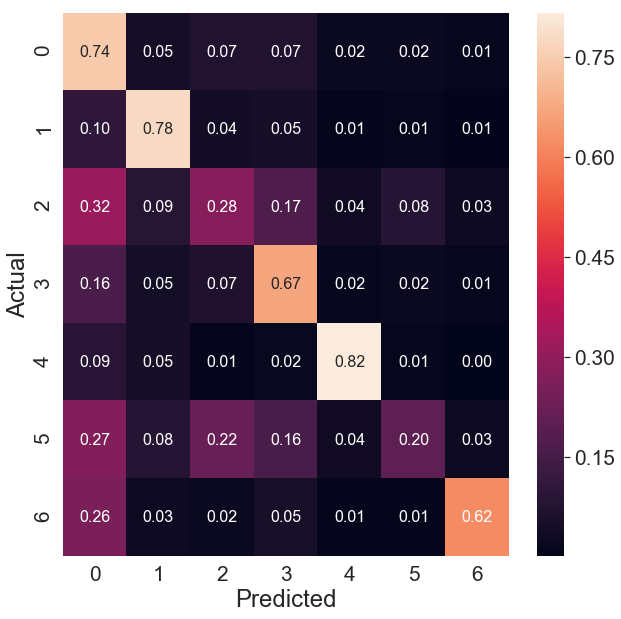

In [29]:
conf_mat = confusion_matrix(label_test, y_pred)
cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.9)
sns.heatmap(cm, annot=True, fmt = '.2f',
            xticklabels=[0,1,2,3,4,5,6], yticklabels=[0,1,2,3,4,5,6], annot_kws={"size": 16})
plt.ylabel('Actual', fontsize = 24)
plt.xlabel('Predicted', fontsize = 24)
plt.show()